In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [168]:
df = pd.read_csv('./Player_Stats.csv')

In [169]:
df.head()

,Player,PPR,Day,G#,Week,Season,Date,Age,Team,Home,Opp,Result,FantPt,PPR.1,DKPt,FDPt,Pos,Draft,Player-additional
0,Davante Adams,41.60,Sun,1,1,2020,2020-09-13,27-264,GNB,@,MIN,W 43-34,27.60,41.60,44.6,34.6,WR,Feb-53,NaN
1,Josh Jacobs,35.90,Sun,1,1,2020,2020-09-13,22-215,LVR,@,CAR,W 34-30,31.90,35.90,35.9,33.9,RB,24-Jan,NaN
2,Calvin Ridley,33.90,Sun,1,1,2020,2020-09-13,25-268,ATL,NaN,SEA,L 25-38,24.90,33.90,36.9,29.4,WR,26-Jan,NaN
3,Russell Wilson,31.78,Sun,1,1,2020,2020-09-13,31-289,SEA,@,ATL,W 38-25,31.78,31.78,34.8,31.8,QB,Mar-75,NaN
4,Adam Thielen,31.00,Sun,1,1,2020,2020-09-13,30-022,MIN,NaN,GNB,L 34-43,25.00,31.00,34.0,28.0,WR,NaN,NaN


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             11199 non-null  object 
 1   PPR                11199 non-null  float64
 2   Day                11199 non-null  object 
 3   G#                 11199 non-null  int64  
 4   Week               11199 non-null  int64  
 5   Season             11199 non-null  int64  
 6   Date               11199 non-null  object 
 7   Age                11199 non-null  object 
 8   Team               11199 non-null  object 
 9   Home               5607 non-null   object 
 10  Opp                11199 non-null  object 
 11  Result             11199 non-null  object 
 12  FantPt             11199 non-null  float64
 13  PPR.1              11199 non-null  float64
 14  DKPt               11199 non-null  float64
 15  FDPt               11199 non-null  float64
 16  Pos                111

In [171]:
#df['Season'] = pd.to_numeric(df['Season'])

In [172]:
df['Home'] = df['Home'].apply(lambda x: 0 if x == '@' else 1)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             11199 non-null  object 
 1   PPR                11199 non-null  float64
 2   Day                11199 non-null  object 
 3   G#                 11199 non-null  int64  
 4   Week               11199 non-null  int64  
 5   Season             11199 non-null  int64  
 6   Date               11199 non-null  object 
 7   Age                11199 non-null  object 
 8   Team               11199 non-null  object 
 9   Home               11199 non-null  int64  
 10  Opp                11199 non-null  object 
 11  Result             11199 non-null  object 
 12  FantPt             11199 non-null  float64
 13  PPR.1              11199 non-null  float64
 14  DKPt               11199 non-null  float64
 15  FDPt               11199 non-null  float64
 16  Pos                111

In [174]:
df = df.drop(columns=['G#', 'Date', 'Result', 'FantPt', 'PPR.1', 'DKPt', 'FDPt', 'Draft', 'Player-additional'])

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  11199 non-null  object 
 1   PPR     11199 non-null  float64
 2   Day     11199 non-null  object 
 3   Week    11199 non-null  int64  
 4   Season  11199 non-null  int64  
 5   Age     11199 non-null  object 
 6   Team    11199 non-null  object 
 7   Home    11199 non-null  int64  
 8   Opp     11199 non-null  object 
 9   Pos     11191 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 875.0+ KB


In [176]:
df['Age'] = df.Age.str[0:2]

In [177]:
df[['Age','Season']] = df[['Age','Season']].apply(pd.to_numeric)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  11199 non-null  object 
 1   PPR     11199 non-null  float64
 2   Day     11199 non-null  object 
 3   Week    11199 non-null  int64  
 4   Season  11199 non-null  int64  
 5   Age     11199 non-null  int64  
 6   Team    11199 non-null  object 
 7   Home    11199 non-null  int64  
 8   Opp     11199 non-null  object 
 9   Pos     11191 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 875.0+ KB


In [179]:
Dome_Dict = {
    "ARI" : 1,
    "ATL" : 1,
    "DAL" : 1,
    "DET" : 1,
    "HOU" : 1,
    "IND" : 1,
    "LAC" : 1,
    "LAR" : 1,
    "LVR" : 1,
    "MIN" : 1,
    "NOR" : 1,
}

In [180]:
df['Dome_Home'] = df['Team'].apply(lambda x: 1 if x in Dome_Dict.keys() else 0)
df['Dome_Away'] = df['Opp'].apply(lambda x: 1 if x in Dome_Dict.keys() else 0)

In [181]:
df['Dome'] = df['Dome_Home'] + df['Dome_Away']

In [182]:
df = df.drop(columns= ['Dome_Home', 'Dome_Away'])

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  11199 non-null  object 
 1   PPR     11199 non-null  float64
 2   Day     11199 non-null  object 
 3   Week    11199 non-null  int64  
 4   Season  11199 non-null  int64  
 5   Age     11199 non-null  int64  
 6   Team    11199 non-null  object 
 7   Home    11199 non-null  int64  
 8   Opp     11199 non-null  object 
 9   Pos     11191 non-null  object 
 10  Dome    11199 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 962.5+ KB


In [184]:
defenses = pd.read_csv('./Defenses.csv')
defenses

,Year,RANK,NAME,PTS,FPTS,SACKS,INT,TO,PTS.1,PLAYS,...,RUSH YDS,RUSH ATT,RUSH TD,TD,RZ ATT,RZ TD,RZ TD%,1D,3D%,4D%
0,2022,1,TAM,6,45,11,5,8,27,191,...,238,63,0,3,5,3,60.0,44,30.2,33.3
1,2022,2,DEN,2,28,9,1,4,36,160,...,244,56,0,3,4,1,25.0,47,26.5,25.0
2,2022,3,SFO,0,25,8,3,4,37,173,...,236,84,2,5,4,3,75.0,43,32.5,0.0
3,2022,4,BUF,8,41,11,5,7,38,158,...,173,62,3,5,6,5,83.3,46,39.4,75.0
4,2022,4,JAX,0,36,7,6,8,38,176,...,165,53,0,5,7,3,42.9,51,42.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2017,28,NYG,14,1224,27,13,19,388,1052,...,1933,464,10,44,53,29,54.7,313,39.6,29.4
188,2017,28,WAS,12,1097,41,16,23,388,1045,...,2146,472,13,41,57,29,50.9,307,36.7,60.0
189,2017,30,IND,10,1165,26,13,20,404,1026,...,1929,487,15,44,51,27,52.9,324,44.7,50.0
190,2017,31,CLE,6,1132,34,7,13,410,1026,...,1566,467,14,48,46,31,67.4,315,40.6,50.0


In [185]:
defenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       192 non-null    int64  
 1   RANK       192 non-null    int64  
 2   NAME       192 non-null    object 
 3   PTS        192 non-null    int64  
 4   FPTS       192 non-null    int64  
 5   SACKS      192 non-null    int64  
 6   INT        192 non-null    int64  
 7   TO         192 non-null    int64  
 8   PTS.1      192 non-null    int64  
 9   PLAYS      192 non-null    int64  
 10  YDS        192 non-null    int64  
 11  PASS YDS   192 non-null    int64  
 12  PASS ATT   192 non-null    int64  
 13  PASS COMP  192 non-null    int64  
 14  PASS TD    192 non-null    int64  
 15  RUSH YDS   192 non-null    int64  
 16  RUSH ATT   192 non-null    int64  
 17  RUSH TD    192 non-null    int64  
 18  TD         192 non-null    int64  
 19  RZ ATT     192 non-null    int64  
 20  RZ TD     

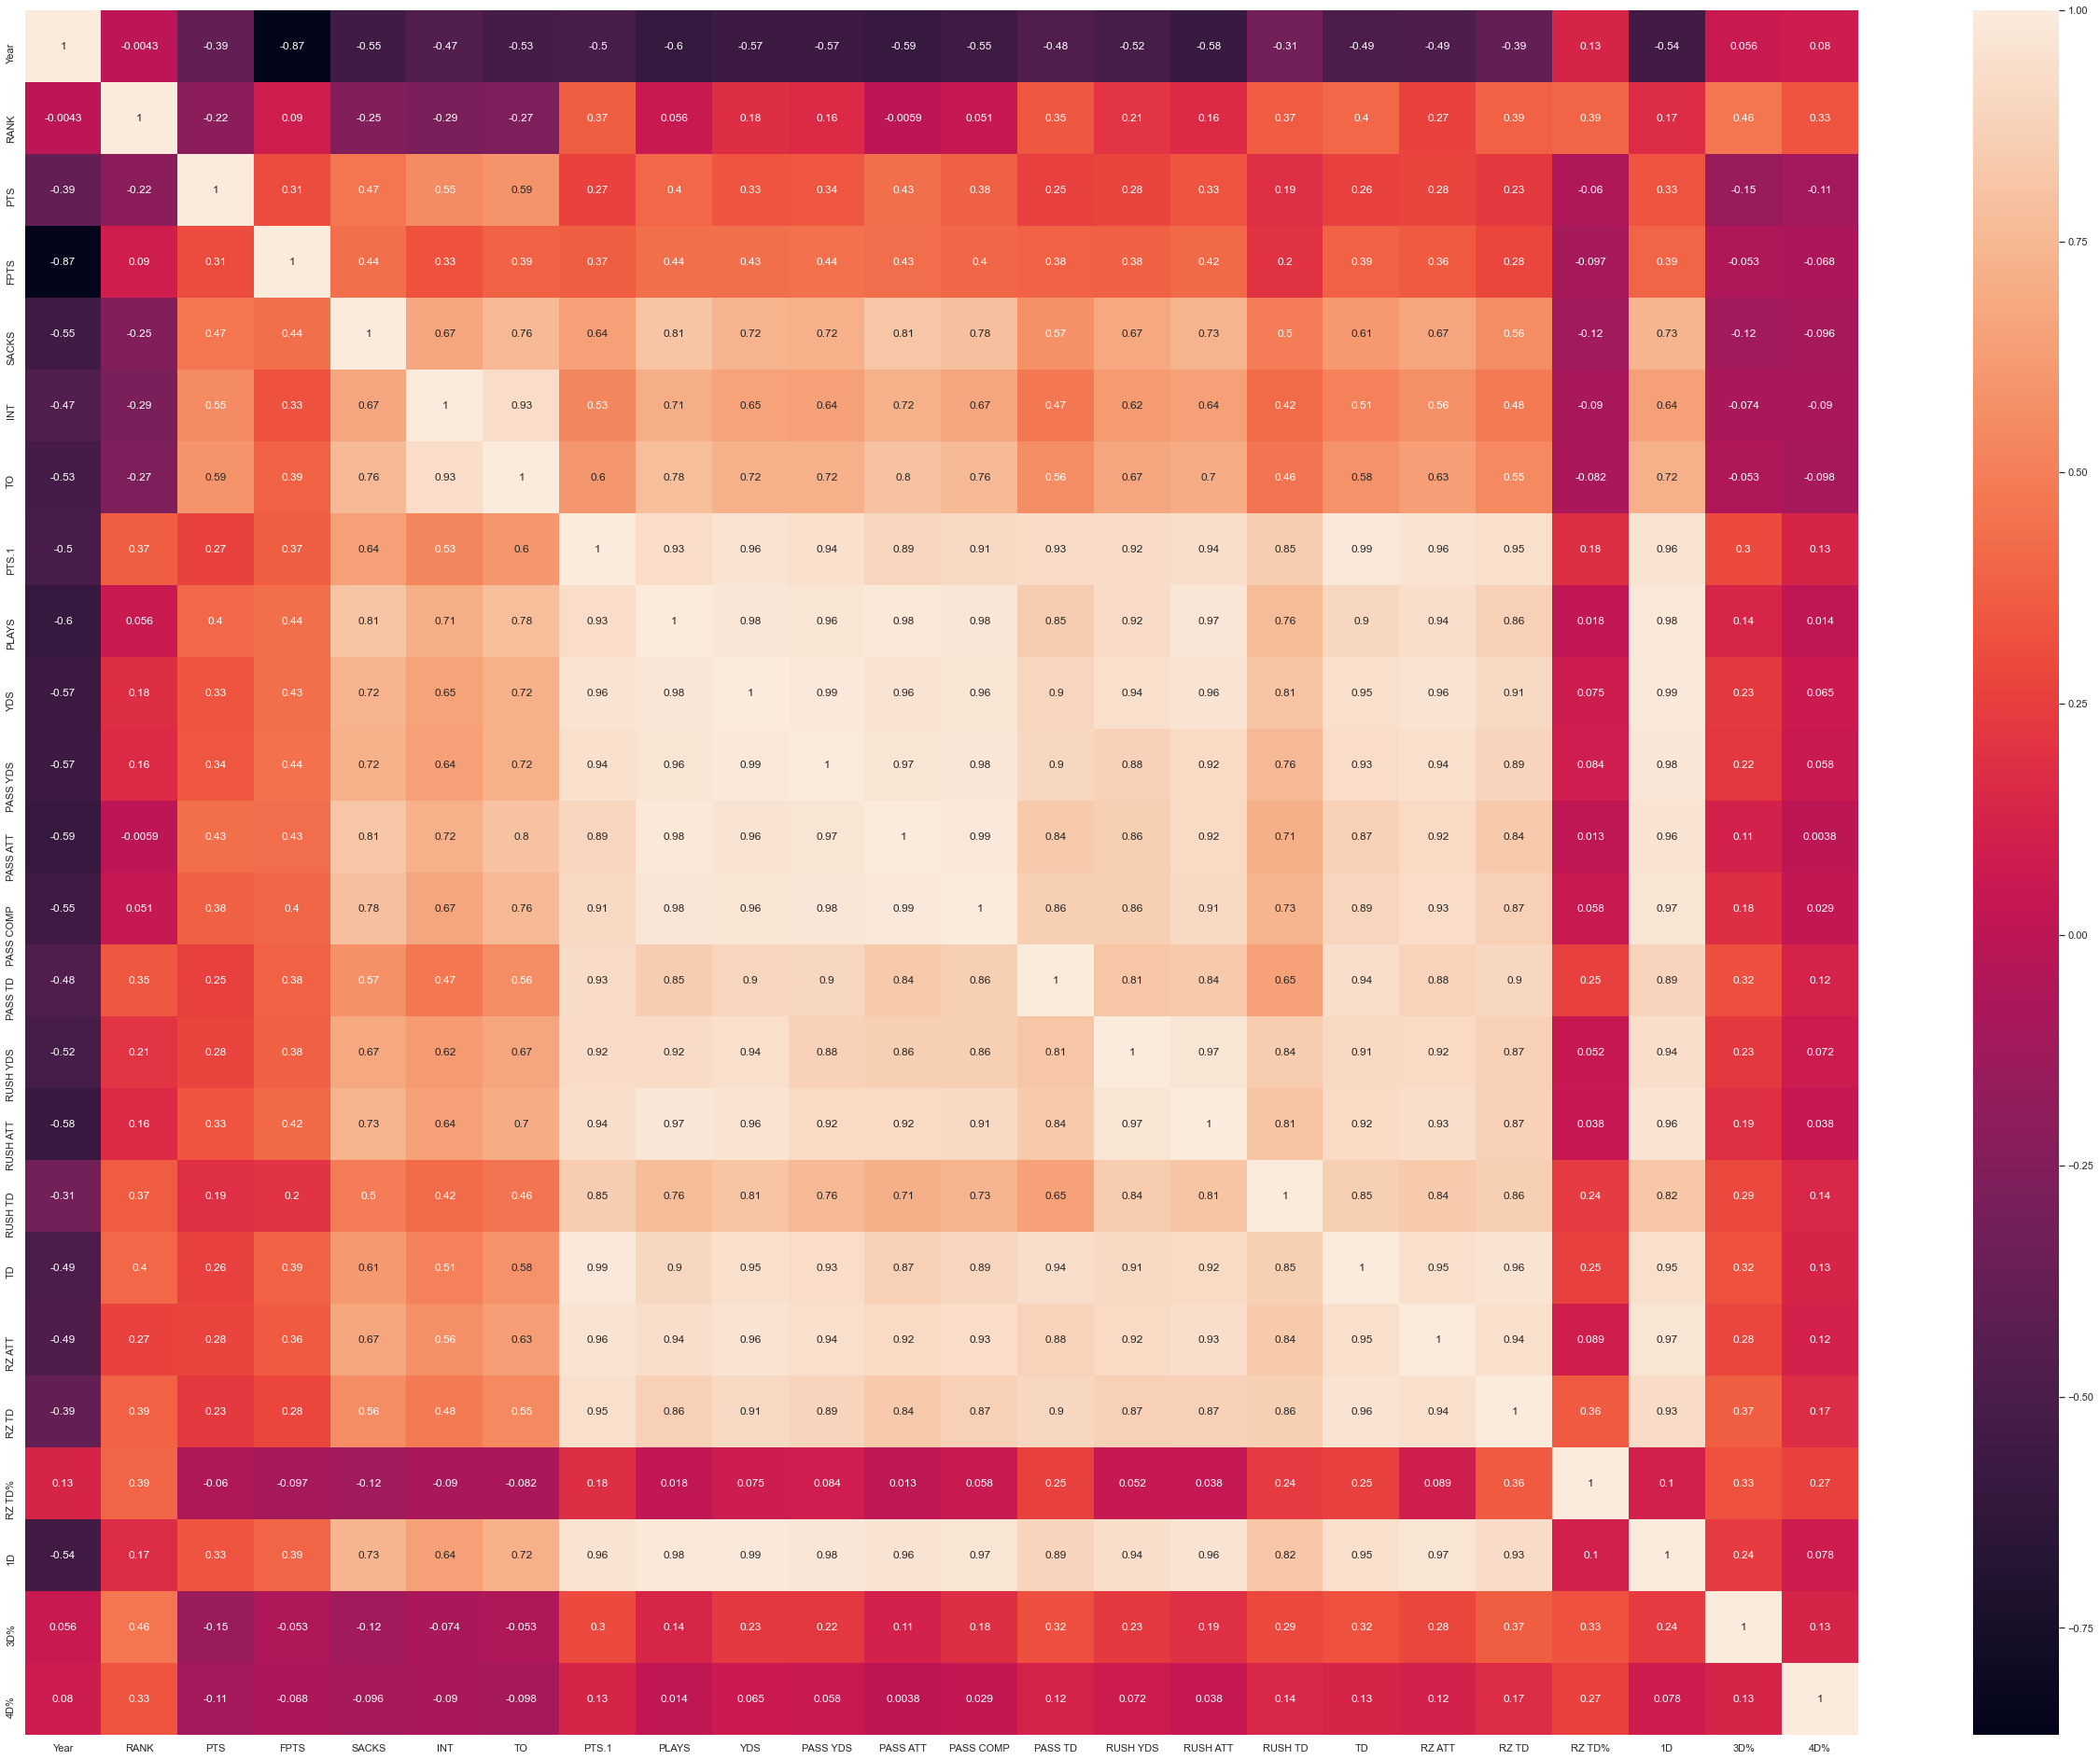

In [202]:
plt.figure(figsize=(44, 34))
sns.set(rc={'figure.figsize':(124.24, 100.24)})
sns.heatmap(defenses.corr(), annot=True)
sns.set(font_scale=2)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [197]:
defenses.corr()

,Year,RANK,PTS,FPTS,SACKS,INT,TO,PTS.1,PLAYS,YDS,...,RUSH YDS,RUSH ATT,RUSH TD,TD,RZ ATT,RZ TD,RZ TD%,1D,3D%,4D%
Year,1.000000,-0.004293,-0.391093,-0.866047,-0.552427,-0.470043,-0.527978,-0.504734,-0.602408,-0.569856,...,-0.518079,-0.581865,-0.313266,-0.487743,-0.486146,-0.388796,0.131471,-0.539973,0.056228,0.080255
RANK,-0.004293,1.000000,-0.216545,0.089852,-0.247272,-0.289617,-0.274858,0.369594,0.055741,0.181725,...,0.208696,0.160960,0.365557,0.402868,0.269666,0.386609,0.393467,0.169356,0.462970,0.334539
PTS,-0.391093,-0.216545,1.000000,0.306522,0.465452,0.548412,0.587068,0.270828,0.403144,0.330615,...,0.277475,0.332993,0.189628,0.262489,0.278023,0.228555,-0.060052,0.332208,-0.146815,-0.108733
FPTS,-0.866047,0.089852,0.306522,1.000000,0.435216,0.327947,0.385304,0.371087,0.436566,0.433568,...,0.377617,0.416601,0.199176,0.385900,0.355591,0.280976,-0.096948,0.390794,-0.053351,-0.067642
SACKS,-0.552427,-0.247272,0.465452,0.435216,1.000000,0.668790,0.757595,0.637397,0.807198,0.723836,...,0.674603,0.725488,0.495302,0.608946,0.669073,0.557086,-0.115807,0.731869,-0.120921,-0.095802
INT,-0.470043,-0.289617,0.548412,0.327947,0.668790,1.000000,0.929883,0.528236,0.705127,0.650170,...,0.617892,0.641116,0.419605,0.507046,0.563486,0.476599,-0.089630,0.636456,-0.074068,-0.090438
TO,-0.527978,-0.274858,0.587068,0.385304,0.757595,0.929883,1.000000,0.601053,0.778457,0.720786,...,0.666722,0.700327,0.459277,0.578271,0.634594,0.545953,-0.082206,0.716659,-0.053362,-0.097778
PTS.1,-0.504734,0.369594,0.270828,0.371087,0.637397,0.528236,0.601053,1.000000,0.928279,0.962695,...,0.923057,0.940568,0.852623,0.988802,0.962379,0.948909,0.176926,0.960732,0.295364,0.130885
PLAYS,-0.602408,0.055741,0.403144,0.436566,0.807198,0.705127,0.778457,0.928279,1.000000,0.977699,...,0.923898,0.970982,0.764020,0.903833,0.940599,0.863240,0.018089,0.978638,0.138962,0.014481
YDS,-0.569856,0.181725,0.330615,0.433568,0.723836,0.650170,0.720786,0.962695,0.977699,1.000000,...,0.944751,0.960846,0.808539,0.948674,0.962052,0.907961,0.075474,0.990747,0.232347,0.064679


In [186]:
clean_d = defenses.rename(columns={'Year': 'Season','NAME': 'Opp'})

In [187]:
clean_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Season     192 non-null    int64  
 1   RANK       192 non-null    int64  
 2   Opp        192 non-null    object 
 3   PTS        192 non-null    int64  
 4   FPTS       192 non-null    int64  
 5   SACKS      192 non-null    int64  
 6   INT        192 non-null    int64  
 7   TO         192 non-null    int64  
 8   PTS.1      192 non-null    int64  
 9   PLAYS      192 non-null    int64  
 10  YDS        192 non-null    int64  
 11  PASS YDS   192 non-null    int64  
 12  PASS ATT   192 non-null    int64  
 13  PASS COMP  192 non-null    int64  
 14  PASS TD    192 non-null    int64  
 15  RUSH YDS   192 non-null    int64  
 16  RUSH ATT   192 non-null    int64  
 17  RUSH TD    192 non-null    int64  
 18  TD         192 non-null    int64  
 19  RZ ATT     192 non-null    int64  
 20  RZ TD     

In [188]:
#defenses = defenses[defenses['Season'] >= 2020]

In [189]:
clean_d

,Season,RANK,Opp,PTS,FPTS,SACKS,INT,TO,PTS.1,PLAYS,...,RUSH YDS,RUSH ATT,RUSH TD,TD,RZ ATT,RZ TD,RZ TD%,1D,3D%,4D%
0,2022,1,TAM,6,45,11,5,8,27,191,...,238,63,0,3,5,3,60.0,44,30.2,33.3
1,2022,2,DEN,2,28,9,1,4,36,160,...,244,56,0,3,4,1,25.0,47,26.5,25.0
2,2022,3,SFO,0,25,8,3,4,37,173,...,236,84,2,5,4,3,75.0,43,32.5,0.0
3,2022,4,BUF,8,41,11,5,7,38,158,...,173,62,3,5,6,5,83.3,46,39.4,75.0
4,2022,4,JAX,0,36,7,6,8,38,176,...,165,53,0,5,7,3,42.9,51,42.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2017,28,NYG,14,1224,27,13,19,388,1052,...,1933,464,10,44,53,29,54.7,313,39.6,29.4
188,2017,28,WAS,12,1097,41,16,23,388,1045,...,2146,472,13,41,57,29,50.9,307,36.7,60.0
189,2017,30,IND,10,1165,26,13,20,404,1026,...,1929,487,15,44,51,27,52.9,324,44.7,50.0
190,2017,31,CLE,6,1132,34,7,13,410,1026,...,1566,467,14,48,46,31,67.4,315,40.6,50.0


In [190]:
defense_rank = clean_d.filter(items=clean_d.columns)

In [191]:
clean_df = df.merge(defense_rank, on=['Season', 'Opp'], suffixes=('_left','_right'))

In [192]:
clean_df

,Player,PPR,Day,Week,Season,Age,Team,Home,Opp,Pos,...,RUSH YDS,RUSH ATT,RUSH TD,TD,RZ ATT,RZ TD,RZ TD%,1D,3D%,4D%
0,Davante Adams,41.60,Sun,1,2020,27,GNB,0,MIN,WR,...,2151,472,19,50,58,34,58.6,366,39.5,70.8
1,Aaron Rodgers,30.76,Sun,1,2020,36,GNB,0,MIN,QB,...,2151,472,19,50,58,34,58.6,366,39.5,70.8
2,Marquez Valdes-Scantling,19.60,Sun,1,2020,25,GNB,0,MIN,WR,...,2151,472,19,50,58,34,58.6,366,39.5,70.8
3,Allen Lazard,18.20,Sun,1,2020,24,GNB,0,MIN,wr,...,2151,472,19,50,58,34,58.6,366,39.5,70.8
4,Aaron Jones,17.60,Sun,1,2020,25,GNB,0,MIN,RB,...,2151,472,19,50,58,34,58.6,366,39.5,70.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Justin Tucker,10.00,Sun,2,2022,32,BAL,1,MIA,K,...,348,70,1,8,8,5,62.5,71,48.6,42.9
11195,Isaiah Likely,8.30,Sun,2,2022,22,BAL,1,MIA,TE,...,348,70,1,8,8,5,62.5,71,48.6,42.9
11196,Demarcus Robinson,8.20,Sun,2,2022,27,BAL,1,MIA,WR,...,348,70,1,8,8,5,62.5,71,48.6,42.9
11197,Tylan Wallace,1.90,Sun,2,2022,23,BAL,1,MIA,WR,...,348,70,1,8,8,5,62.5,71,48.6,42.9


In [203]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11198
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     11199 non-null  object 
 1   PPR        11199 non-null  float64
 2   Day        11199 non-null  object 
 3   Week       11199 non-null  int64  
 4   Season     11199 non-null  int64  
 5   Age        11199 non-null  int64  
 6   Team       11199 non-null  object 
 7   Home       11199 non-null  int64  
 8   Opp        11199 non-null  object 
 9   Pos        11191 non-null  object 
 10  Dome       11199 non-null  int64  
 11  RANK       11199 non-null  int64  
 12  PTS        11199 non-null  int64  
 13  FPTS       11199 non-null  int64  
 14  SACKS      11199 non-null  int64  
 15  INT        11199 non-null  int64  
 16  TO         11199 non-null  int64  
 17  PTS.1      11199 non-null  int64  
 18  PLAYS      11199 non-null  int64  
 19  YDS        11199 non-null  int64  
 20  PASS Y

In [204]:
clean_df = clean_df.drop(columns= ['Season', 'YDS','FPTS', 'PLAYS', 'PASS ATT', 'PASS COMP', 'RUSH ATT', 'TD' ])

In [205]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11198
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    11199 non-null  object 
 1   PPR       11199 non-null  float64
 2   Day       11199 non-null  object 
 3   Week      11199 non-null  int64  
 4   Age       11199 non-null  int64  
 5   Team      11199 non-null  object 
 6   Home      11199 non-null  int64  
 7   Opp       11199 non-null  object 
 8   Pos       11191 non-null  object 
 9   Dome      11199 non-null  int64  
 10  RANK      11199 non-null  int64  
 11  PTS       11199 non-null  int64  
 12  SACKS     11199 non-null  int64  
 13  INT       11199 non-null  int64  
 14  TO        11199 non-null  int64  
 15  PTS.1     11199 non-null  int64  
 16  PASS YDS  11199 non-null  int64  
 17  PASS TD   11199 non-null  int64  
 18  RUSH YDS  11199 non-null  int64  
 19  RUSH TD   11199 non-null  int64  
 20  RZ ATT    11199 non-null  in

In [206]:
QB_df = clean_df[clean_df['Pos'] == 'QB']

In [207]:
QB_df

,Player,PPR,Day,Week,Age,Team,Home,Opp,Pos,Dome,...,PASS YDS,PASS TD,RUSH YDS,RUSH TD,RZ ATT,RZ TD,RZ TD%,1D,3D%,4D%
1,Aaron Rodgers,30.76,Sun,1,36,GNB,0,MIN,QB,1,...,4141,30,2151,19,58,34,58.6,366,39.5,70.8
14,Philip Rivers,10.86,Sun,2,38,IND,1,MIN,QB,2,...,4141,30,2151,19,58,34,58.6,366,39.5,70.8
24,Ryan Tannehill,12.74,Sun,3,32,TEN,0,MIN,QB,1,...,4141,30,2151,19,58,34,58.6,366,39.5,70.8
32,Deshaun Watson,20.90,Sun,4,25,HOU,1,MIN,QB,2,...,4141,30,2151,19,58,34,58.6,366,39.5,70.8
42,Russell Wilson,24.48,Sun,5,31,SEA,1,MIN,QB,1,...,4141,30,2151,19,58,34,58.6,366,39.5,70.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,Cooper Rush,13.60,Sun,2,28,DAL,1,CIN,QB,1,...,674,2,258,1,6,3,50.0,51,32.6,25.0
11162,Trey Lance,9.96,Sun,1,22,SFO,0,CHI,QB,0,...,603,3,471,3,12,6,50.0,60,42.1,33.3
11171,Aaron Rodgers,16.36,Sun,2,38,GNB,1,CHI,QB,0,...,603,3,471,3,12,6,50.0,60,42.1,33.3
11182,Mac Jones,8.52,Sun,1,24,NWE,0,MIA,QB,0,...,893,6,348,1,8,5,62.5,71,48.6,42.9


In [208]:
QB_df.to_csv('QB_df.csv',index=False)